# TITANIC CLASSFICATION

## Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

##### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loaded the Dataset 

In [2]:
titanic = pd.read_csv(r"Titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### DATA CLEANING

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [5]:
titanic.drop(["Cabin"],axis=1,inplace=True)

In [6]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [7]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### EXPLORATORY DATA ANALYSIS

In [9]:
titanic.drop(["Name"],axis=1,inplace=True)

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


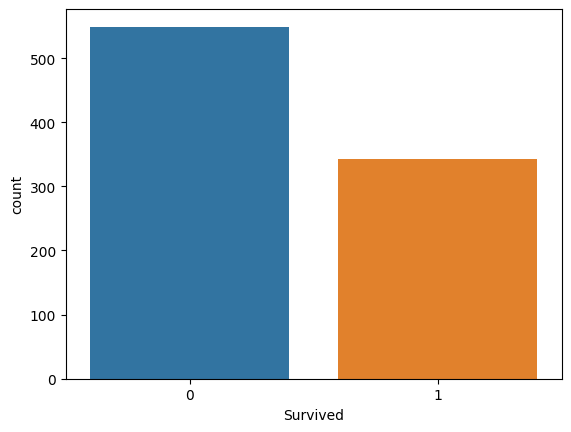

In [11]:
sns.countplot(x="Survived",data = titanic)
plt.show()

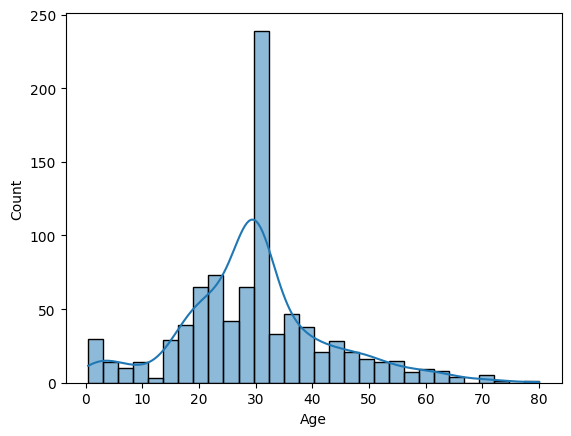

In [12]:
sns.histplot(titanic["Age"],bins=30,kde=True)
plt.show()

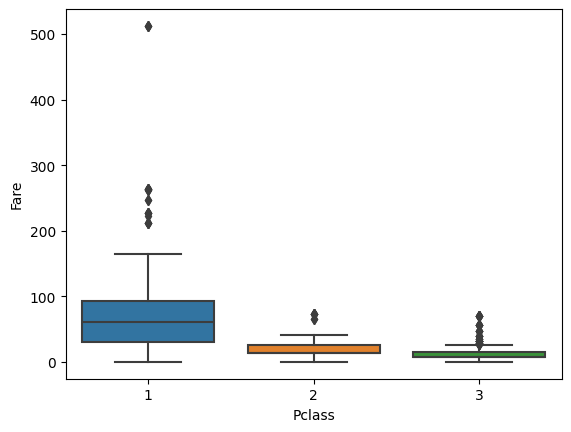

In [13]:
sns.boxplot(x="Pclass",y="Fare",data=titanic)
plt.show()

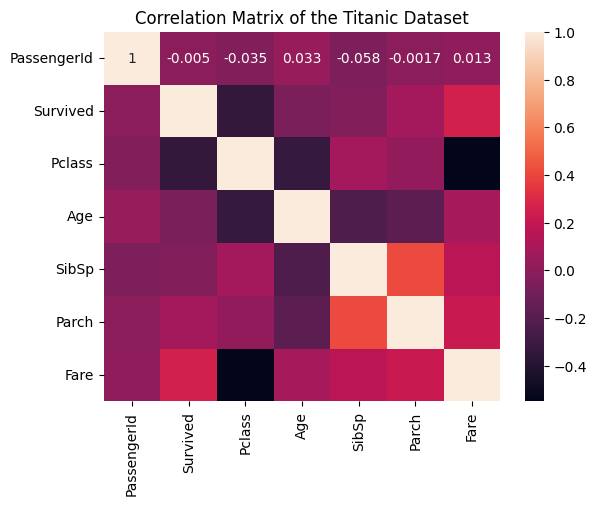

In [14]:
correlation_matrix = titanic.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix of the Titanic Dataset")
plt.show()

### Univariate Analysis

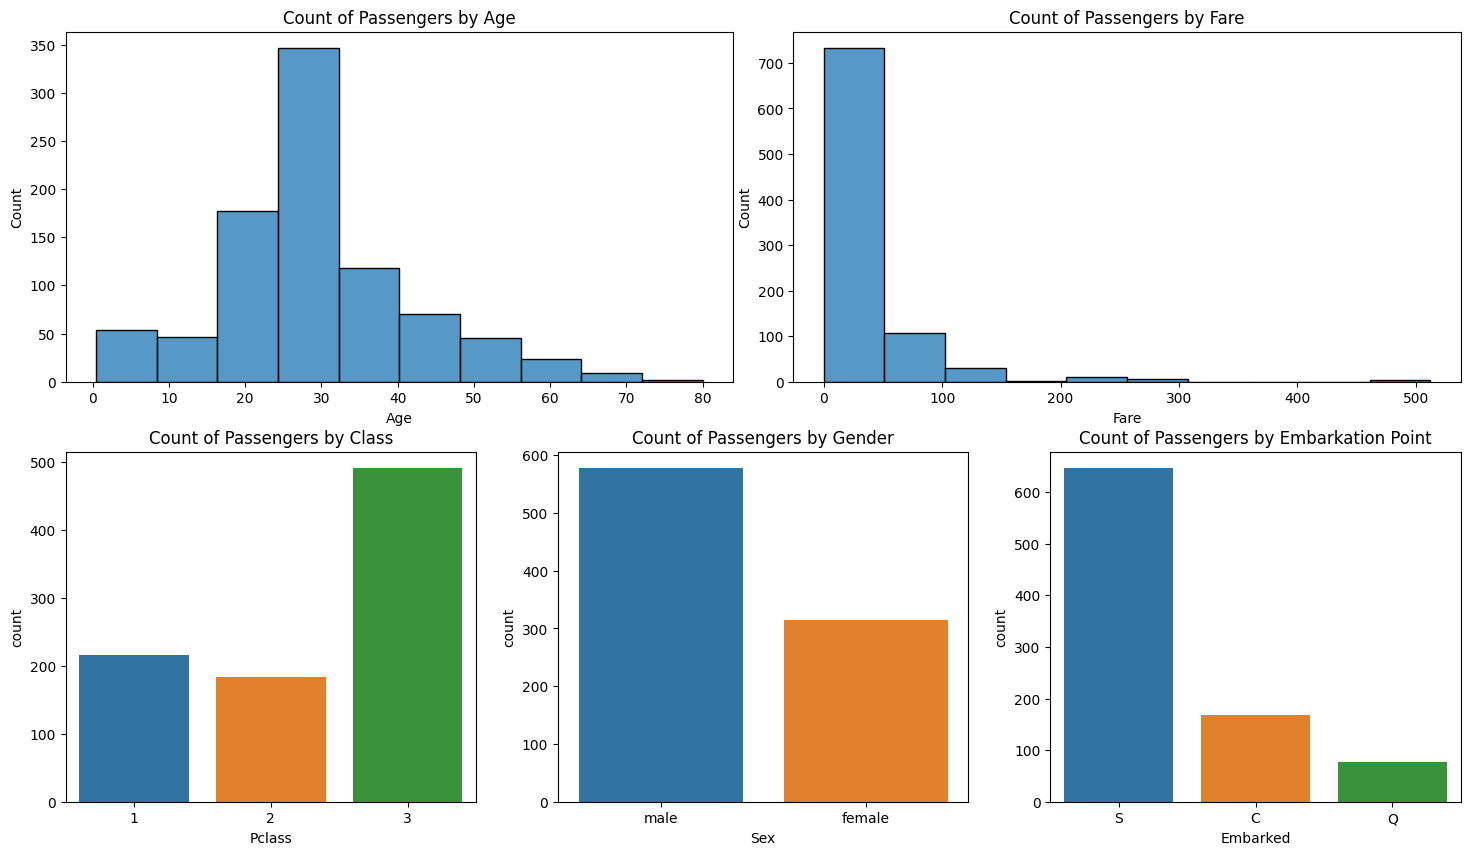

In [15]:
plt.figure(figsize=(18,10))

plt.subplot(2,4,(1,2))
sns.histplot(x="Age",bins=10,data=titanic)   
plt.title("Count of Passengers by Age")

plt.subplot(2,4,(3,4))
sns.histplot(x="Fare",bins=10,data=titanic)

plt.title("Count of Passengers by Fare")

plt.subplot(2,3,4)
sns.countplot(x='Pclass', data=titanic)
plt.title('Count of Passengers by Class')

plt.subplot(2,3,5)
sns.countplot(x='Sex', data=titanic)
plt.title('Count of Passengers by Gender')

plt.subplot(2,3,6)
sns.countplot(x='Embarked', data=titanic)
plt.title('Count of Passengers by Embarkation Point')
plt.show()

### Bivariate Analysis

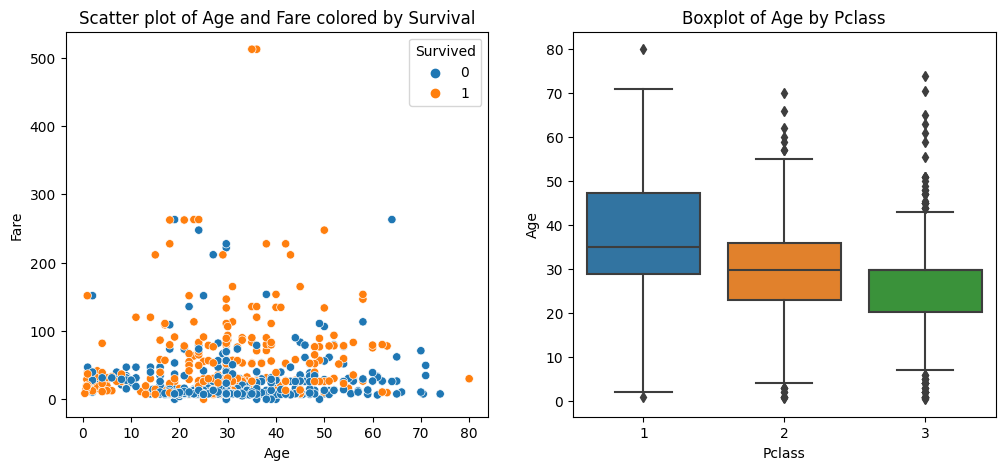

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="Age",y="Fare",data = titanic,hue = "Survived")
plt.title('Scatter plot of Age and Fare colored by Survival')

plt.subplot(1,2,2)
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.title('Boxplot of Age by Pclass')

plt.show()

### Multivariate Analysis

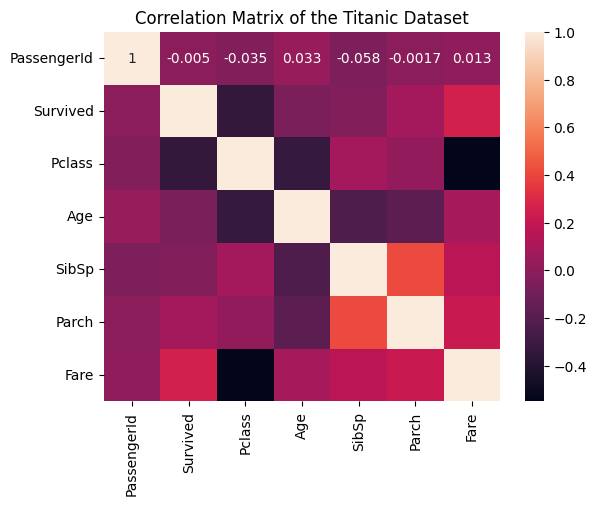

In [17]:
correlation_matrix = titanic.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix of the Titanic Dataset")
plt.show()

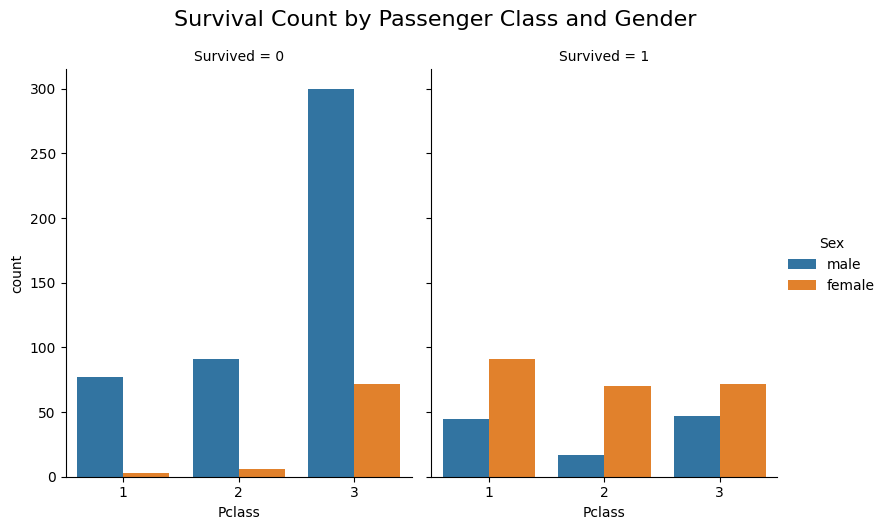

In [18]:
sns.catplot(x="Pclass",hue="Sex",col="Survived",data=titanic,kind ='count',height =5, aspect=0.8)
plt.suptitle("Survival Count by Passenger Class and Gender", y=1.05, fontsize=16)
plt.show()


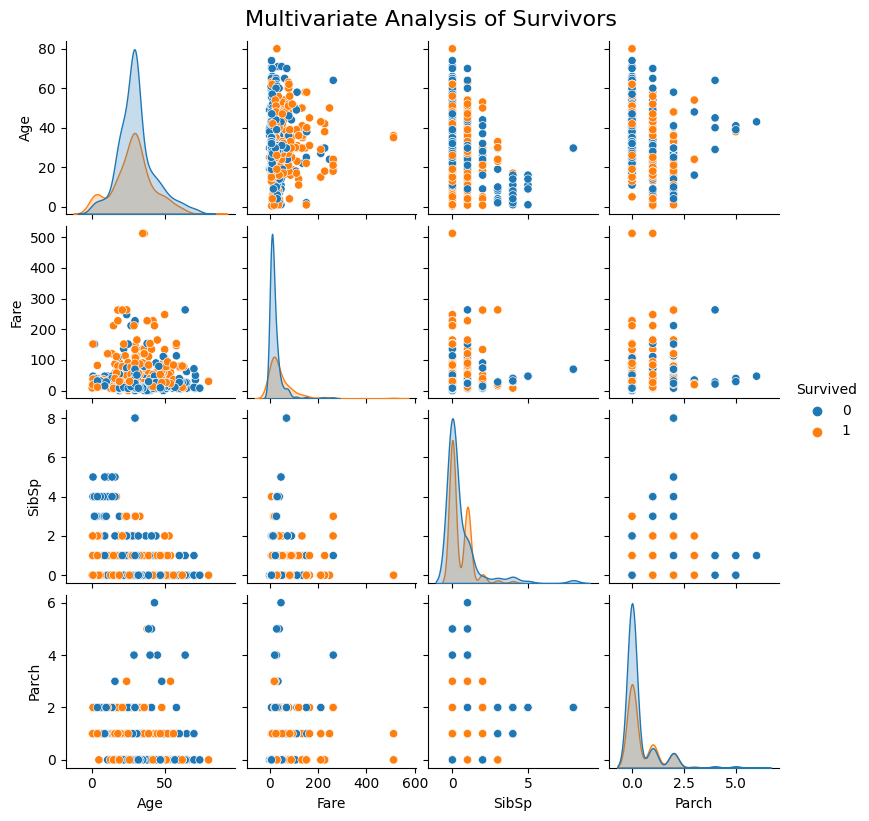

In [19]:
sns.pairplot(titanic[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']],hue = "Survived",height =2)
plt.suptitle("Multivariate Analysis of Survivors", y=1.02, fontsize=16)
plt.show()

### Predictive Model

##### Loading all Libraries needed

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

##### Encoding and dropping the required columns

In [22]:
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic['Sex']=label_encoder.fit_transform(titanic['Sex'])
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("PassengerId",axis=1,inplace=True)

In [23]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


##### Splitting the training/testing data

In [24]:
X= titanic.drop('Survived',axis=1)
y= titanic['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Training the model

In [25]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [26]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred=model.predict(X_test)

#### Prediction Score

In [28]:
print("Accuracy score :",accuracy_score(y_test,y_pred)*100,"%")

print("Report :\n",classification_report(y_test,y_pred))

Accuracy score : 81.00558659217877 %
Report :
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### We have got an Accuracy score of 81% using Random Forrest Classifier Model